In [ ]:
%pip install zip

In [ ]:
import zipfile

#Upload images (husky.train.zip)
zip_filename = "/tmp/husky.train.zip"

# Extract files
zfiles = zipfile.ZipFile(zip_filename, 'r')
zfiles.extractall('/tmp')
zfiles.close()


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > DESIRED_ACCURACY):
      print(f"\nReached {DESIRED_ACCURACY}% accuracy - cancelling training.")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
batch_size = 32
num_px = 128

training_folder   = "/tmp/images/train/"
validation_folder = "/tmp/images/val/"

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(num_px, num_px, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(num_px, num_px, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
training_datagen =  ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30, 
    fill_mode="nearest",
    horizontal_flip=True)

training_generator = training_datagen.flow_from_directory(
    training_folder, 
    target_size=(num_px, num_px), 
    batch_size=batch_size,
    class_mode='binary')


validation_datagen =  ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_folder, 
    target_size=(num_px,num_px), 
    batch_size=batch_size,
    class_mode='binary')

Found 5258 images belonging to 2 classes.
Found 1316 images belonging to 2 classes.


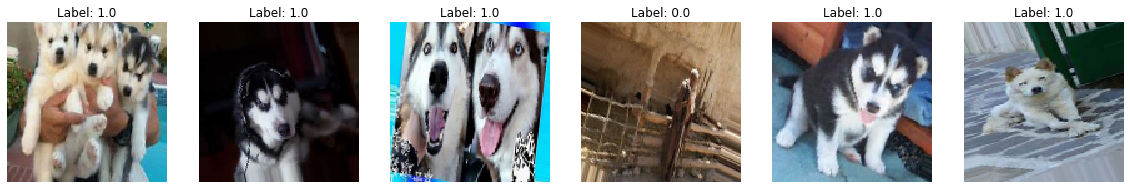

In [ ]:
#show some of the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
x, y = training_generator.next()

num_images = 6
for i in range(num_images):
  plt.subplot(2, num_images, i + 1)
  plt.imshow(x[i], interpolation='nearest')
  plt.axis('off')
  plt.title("Label: " + str(y[i]))


In [ ]:
history = model.fit_generator(training_generator,
                              epochs=200, 
                              steps_per_epoch=80,
                              validation_data=validation_generator,
                              validation_steps=20,
                              callbacks=[callbacks],
                              verbose=1)

Epoch 1/200
80/80 [==============================] - 12s 153ms/step - loss: 0.7678 - accuracy: 0.5293 - val_loss: 0.6918 - val_accuracy: 0.5969
Epoch 2/200
80/80 [==============================] - 12s 150ms/step - loss: 0.6543 - accuracy: 0.6070 - val_loss: 0.6043 - val_accuracy: 0.6922
Epoch 3/200
80/80 [==============================] - 12s 151ms/step - loss: 0.5965 - accuracy: 0.6820 - val_loss: 0.5990 - val_accuracy: 0.7281
Epoch 4/200
80/80 [==============================] - 12s 148ms/step - loss: 0.5864 - accuracy: 0.6990 - val_loss: 0.5754 - val_accuracy: 0.7078
Epoch 5/200
80/80 [==============================] - 12s 151ms/step - loss: 0.5874 - accuracy: 0.6931 - val_loss: 0.5699 - val_accuracy: 0.7375
Epoch 6/200
80/80 [==============================] - 12s 151ms/step - loss: 0.5698 - accuracy: 0.7120 - val_loss: 0.5841 - val_accuracy: 0.6953
Epoch 7/200
80/80 [==============================] - 12s 148ms/step - loss: 0.5719 - accuracy: 0.7045 - val_loss: 0.5743 - val_accuracy:

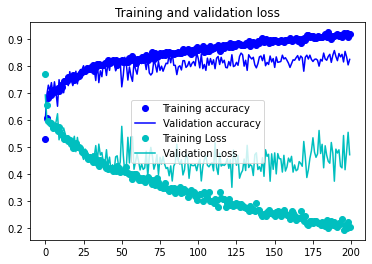

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

#plt.figure()

plt.plot(epochs, loss, 'co', label='Training Loss')
plt.plot(epochs, val_loss, 'c', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save("huskymodel.h5")

In [ ]:
import numpy as np
import imageio
from skimage.transform import resize
import matplotlib.pyplot as plt

def load_image(name):
    image = np.array(imageio.imread(name))
    image = image/255.
    plt.imshow(image)
    image = resize(image, (1, num_px, num_px, 3))
    #print(image.shape)
  
    #image_vector = image.reshape((1, num_px * num_px * 3)).T
    return image

In [ ]:
model.predict(image)